### ROD PUMP PRODUCTION FAILURE ANALYSIS

    - Identifying Risk Factors for Rod Pump Failure
    - Predicting well production and optimizing new well location

### PROBLEM:

    - What production and mechanical parameters are the leading predictors for rod pump failure/downtime?
    - What is best design to mitigate failures in different conditions?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
df_rod = pd.read_csv('../data/rod_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/rod_cleaned.csv'

### Identifying Risk Factors for Rod Pump Failure

objective: 

    -  Identify risk factors for rod pump failures
    -  predict well production and suggest optimal new well locations

approach: EDA (exploratory data analysis)

    -   explore data to understand distribution and relationships of variables
    -   look for correleation matrices, pair plots, and other visualization techniques to see how different variables relate to pump failures.

approach : feature selection

    -   statistical tests and models to select features that significantly impcat pump failure.
    -   techniques like logistic regression for binary classification of failure vs. non-failure can help key predictors

approach: model building

    -   build predictive model to quantify relationship between pump parameters and failure likelihood.
    -   decision trees / random forests / gradient boosting machines

#### Exploratory Data Analysis

In [ ]:
df_rod.head()

,rod_uid,uwi,well_name,well_id,bha_tubing_id,bha_lifetime_start,bha_lifetime_end,bha_lifetime_id,failure_type,h2s_conc,...,shallow_max_sideload,max_unguided_sideload,dsand_dgas_type,chrome_len,enduralloy_len,poly_len,nip_set_depth,pump_bore,gas_anchor_od,bha_lifetime
0,GB27GKBE51029074693667,175-58-0111,box-child-doctor,GPVO63973435661154,GB55QFGB46756147811400,2014-05-02 00:00:00,2019-01-04 10:00:00.000,FGNB86581338411987,Tubing,0.0,...,158.96,143.02,UNKNOWN,0.0,0.00,0.0,10024.8,1.5,OtherOrUnknown,1708
1,GB53OEVX46438297645035,333-68-3523,outside-worry,ZAYT33358197650329,GB29QCCC14341267287129,2018-01-28 14:00:00,2019-05-17 12:00:00.000,XRYU81281518151403,Tubing,0.0,...,179.44,179.44,Miller LLC,0.0,0.00,0.0,10235.6,1.5,3.5,473
2,GB95BPWW35640301552066,165-51-5897,near-learn-simply,FNVL11432909873086,GB02DJAW44801752494129,2011-09-14 00:00:00,2012-08-20 00:00:00.000,PLPR44121073149707,Sucker Rod Pump,0.0,...,105.76,105.76,Miller LLC,0.0,0.00,0.0,10401.9,1.5,OtherOrUnknown,341
3,GB79UEDN31454825972680,543-56-3494,sea-improve-place,JOKL33317998159514,GB84GHPH97287631470412,2016-01-12 09:00:00,2017-03-16 16:30:00.000,MYCF04792093856141,Sucker Rod Pump,0.0,...,47.96,98.18,Miller LLC,0.0,0.00,0.0,9557.7,1.75,4.5,429
4,GB20XCTM13691331349509,391-37-2039,personal-candidate,XOSU92041716672870,GB08VYTX61977431827206,2018-06-14 13:00:00,2020-04-15 17:37:11.338,WJDB83445325478746,No fail,0.0,...,266.68,170.99,Miller LLC,0.0,129.39,0.0,9681.7,1.75,OtherOrUnknown,671


In [ ]:
# Summary statistics
df_rod.describe()

,h2s_conc,primary_setpoint,secondary_setpoint,stroke_len,gross_stroke_len,fillage,yesterday_avg_spm,max_unguided_dls,dls_high_in_hole,gas_anchor_len,...,avg_watersg,route,overall_max_sideload,shallow_max_sideload,max_unguided_sideload,chrome_len,enduralloy_len,poly_len,nip_set_depth,bha_lifetime
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,...,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000
mean,10.201565,74.603984,57.261142,148.365133,129.970339,82.967870,5.507748,2.713471,2.468463,17.293201,...,1.063242,883.424114,187.235874,174.607908,158.379314,7.152157,48.132762,24.095474,9845.990177,481.349384
std,334.210313,6.764605,15.605830,15.358867,24.939641,24.179223,0.930125,5.530577,5.549837,7.106529,...,0.054879,11.973607,107.000244,108.908274,95.982831,82.935394,124.087714,210.200955,625.912946,463.304168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.040000,867.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4066.200000,7.000000
25%,0.000000,75.000000,60.000000,144.000000,124.981415,79.810257,5.200000,1.360000,1.051525,17.130000,...,1.040000,873.000000,139.932500,120.492500,120.167500,0.000000,0.000000,0.000000,9614.325000,187.000000
50%,0.000000,75.000000,60.000000,144.000000,128.993368,87.000000,5.700000,1.941126,1.720000,19.155000,...,1.040000,882.000000,172.605000,158.960000,143.020000,0.000000,0.000000,0.000000,9919.000000,351.000000
75%,0.000000,75.000000,65.000000,145.500000,133.700637,93.000000,5.900000,2.740820,2.700000,20.690000,...,1.040000,886.000000,203.150000,196.897500,174.017500,0.000000,0.000000,0.000000,10210.900000,617.750000
max,16500.000000,91.000000,100.000000,336.000000,655.000000,655.299988,7.700000,92.340000,92.340000,45.330000,...,1.200000,905.000000,1351.030000,1351.030000,1351.030000,1679.460000,1559.440000,3389.360000,12069.600000,3885.000000


In [ ]:
# Columns with missing values
df_rod.isnull().sum()[df_rod.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
# deal with missing values
from sklearn.impute import SimpleImputer

# Imputer for numerical values
num_imputer = SimpleImputer(strategy='median')  # or 'mean'
numerical_cols = ['gross_stroke_len', 'fillage', 'yesterday_avg_spm', 'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol', 'avg_watersg']
df_rod[numerical_cols] = num_imputer.fit_transform(df_rod[numerical_cols])

# Imputer for categorical values
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = ['failure_type', 'bha_config', 'wellbore_category']
df_rod[categorical_cols] = cat_imputer.fit_transform(df_rod[categorical_cols])

# Dropping columns with more than 50% missing values
df_rod.drop(columns=['gas_anchor_od'], inplace=True)

# Check if any null values remain
df_rod.isnull().sum()[df_rod.isnull().sum() > 0]

Series([], dtype: int64)

## "visualize distribution" of key numerical variables
* avg_oil_vol
* h2s_conc
* avg_press_tubing


In [ ]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

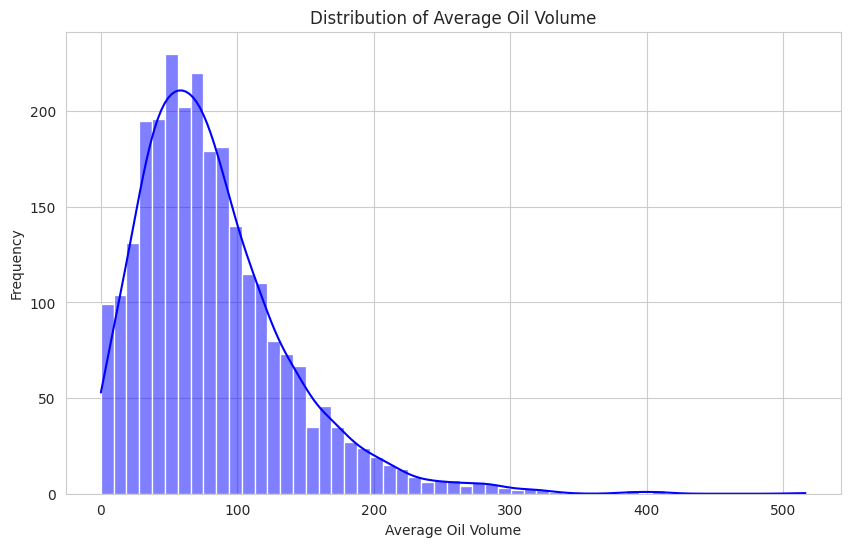

In [ ]:
# Distribution of Average Oil Volume
plt.figure(figsize=(10, 6))
sns.histplot(df_rod['avg_oil_vol'], kde = True, color = 'blue')
plt.title('Distribution of Average Oil Volume')
plt.xlabel('Average Oil Volume')
plt.ylabel('Frequency')
plt.show()


### Distribution of Average Oil Volume
#### variable: "avg_oil_vol"

shape: distribution is normal but slightly right-skewed, suggesting while most wells have moderate oil output, few wells have very high outputs.

outliers: some outliers on higher end, which could be high-producing wells or could indicate data errors?

    -   This variable is crucial for understanding production efficiency and could be correlated with well performance and failure rates.

In [ ]:
df_rod['h2s_conc'].describe()

count     2596.000000
mean        10.201565
std        334.210313
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      16500.000000
Name: h2s_conc, dtype: float64

In [ ]:
h2s = [value for value in df_rod['h2s_conc'] if value != 0]
print(f'{len(h2s)} out of {len(df_rod['h2s_conc'])} have a H2S concentration greater than 0')

141 out of 2596 have a H2S concentration greater than 0


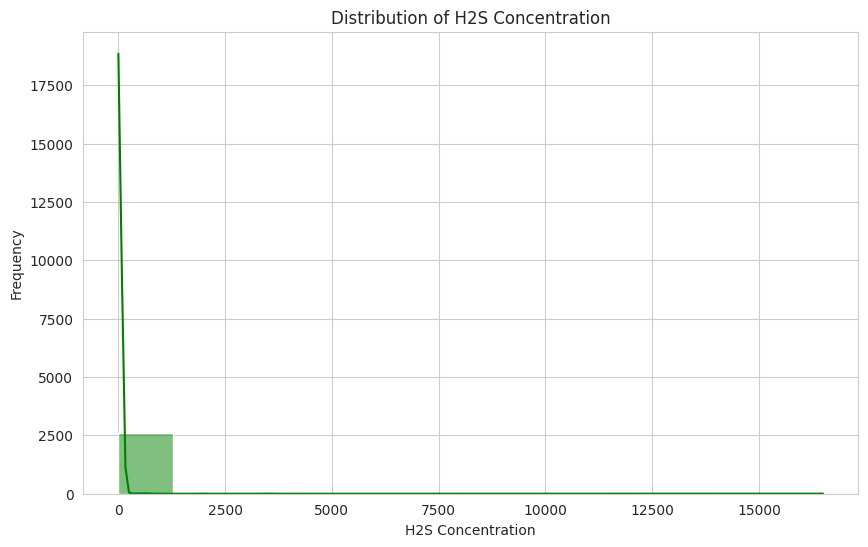

In [ ]:
# Distribution of H2S Concentration
plt.figure(figsize=(10, 6))
sns.histplot(df_rod['h2s_conc'], kde=True, color='green')
plt.title('Distribution of H2S Concentration')
plt.xlabel('H2S Concentration')
plt.ylabel('Frequency')
plt.show()


### Distribution of H2S Concentration
#### variable: "h2s_conc"

shape: highly right skewed, most data clustered near zero, sugesting high concentrations of H2S are rare.

outliers: represent wells with extremely high H2S concentrations, which are corrosive and can significantly impact integrity of well equipment. possible they are input errors

    -   High values of H2S might be risk factor for equipment failure. 
    -   Understanidng which wells have high H2S levels could help in predicting and preventing failures. 

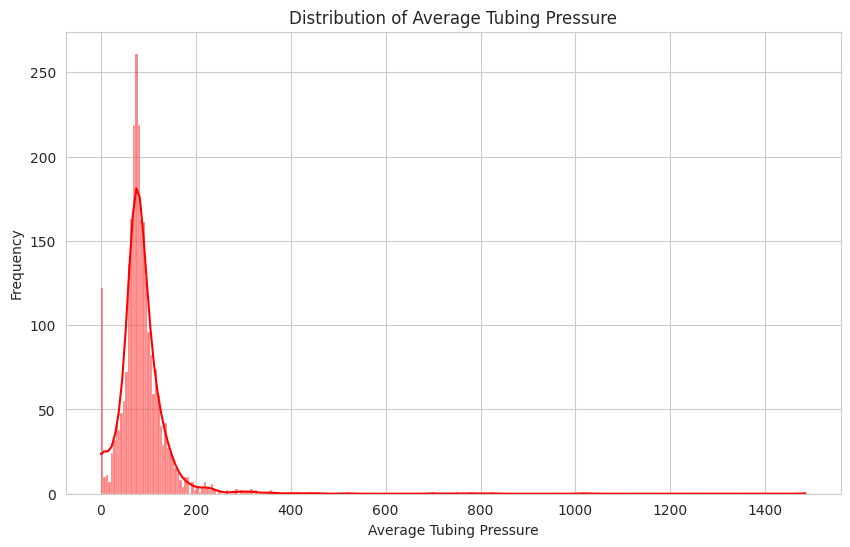

In [ ]:
# Distribution of Average Tubing Pressure
plt.figure(figsize=(10, 6))
sns.histplot(df_rod['avg_press_tubing'], kde=True, color='red')
plt.title('Distribution of Average Tubing Pressure')
plt.xlabel('Average Tubing Pressure')
plt.ylabel('Frequency')
plt.show()

### Distribution of Average Tubing Pressure
#### variable: "avg_press_tubing"

shape: right-skewed with peak at lower pressure values and long tail extending towards higher pressures.

outliers: similar to H2S concentration, the few high values might represent abnormal or stress conditions within well.

    -   Tubing pressure is critical for operational safety and efficiency. 
    -   Abnormally high or low pressures could indicate malfunctioning equipment or suboptimal operating conditions.

## Visualizations for Additional Variables

* Wellbore Category
    - differences in wellbore types might affect failure rates.

* Chemical Treatment Usage (chemgroup1_any, chemgroup2_any, chemgroup3_any)
    - The use and type of chemical treatments could impact the longevity and efficiency of the pumps.

* Mechanical Varialbes (max_unguided_dls, dls_high_in_hole, gas_anchor_len, max_incline)
    - Mechanical stresses and configurations are critical for understanding physical failure mechanisms.

* Pressure Varaibles (avg_press_flowline, avg_press_casing, avg_diff_press)
    - Pressures throughout the system can indicate operational stress or impending failures.

* Operational Metrics (overall_max_sideload, shallow_max_sideload, max_unguided_sideload)
    - Mechanical load factors are directly related to wear and potential failure.

* Production Volumes (avg_water_vol, avg_liquid_vol)
    - Water and total fluid volumes can be indicative of the well’s phase of life and possible issues.

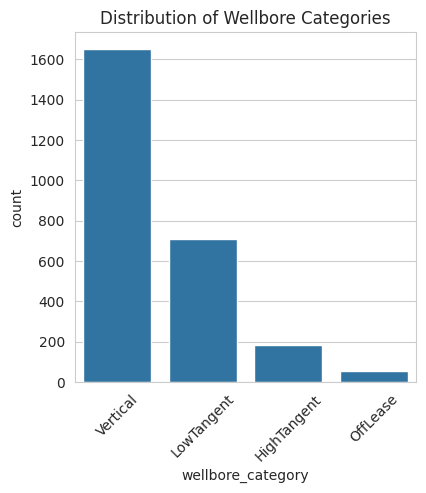

In [ ]:
# wellbore category
# differences in wellbore types might affect failure rates.
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(x = 'wellbore_category', data = df_rod)
plt.title('Distribution of Wellbore Categories')
plt.xticks(rotation = 45)
plt.show()

### Summary of Wellbore Categories Plot

-   the prevalence of vertical wells may imply most analysis on failures and production reflect conditions and challenges unique to this type of wellbore.
-   Differences in failure rates among these categories indicate how wellbore geometry impacts mechanical stresses and pump operation

-   given imbanace in categories, maybe conduct stratified analysis or modeling to understand how wellbore type affects pump performance and failure rates.

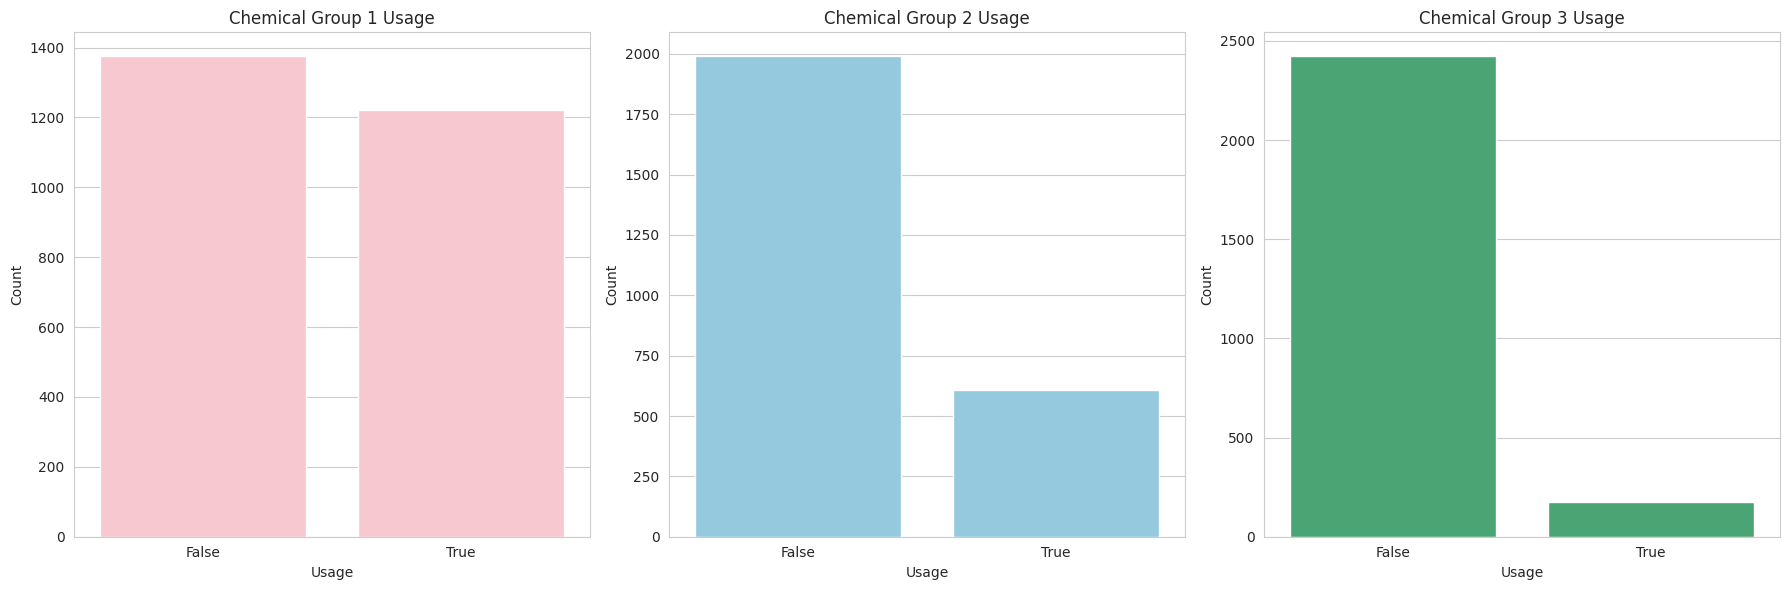

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot for Chemical Group 1 Usage
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.countplot(x='chemgroup1_any', data=df_rod, color = 'pink')
plt.title('Chemical Group 1 Usage')
plt.xlabel('Usage')
plt.ylabel('Count')

# Plot for Chemical Group 2 Usage
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.countplot(x='chemgroup2_any', data=df_rod, color = 'skyblue')
plt.title('Chemical Group 2 Usage')
plt.xlabel('Usage')
plt.ylabel('Count')

# Plot for Chemical Group 3 Usage
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.countplot(x='chemgroup3_any', data=df_rod, color = 'mediumseagreen')
plt.title('Chemical Group 3 Usage')
plt.xlabel('Usage')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Chemical Group 1 Usage
-  Balance: nearly balanced between wells that have used these chemicals (1) and those that have not (0).
    - treatments from Chemical Group 1 are relatively common and may be a standard practice for a significant number of wells.    
    - The balanced distribution suggests a potential area for analysis to determine if these chemicals influence pump performance or failure rates.

### Chemical Group 2 Usage
-   Skew: There is a significant skew towards wells not using Chemical Group 2 (0), with far fewer wells that have used these treatments (1).
    -   Chemical Group 2 treatments are less commonly applied, possibly indicating these are used for specific conditions or well types. 
    -   This could imply that when used, these chemicals are for more targeted issues, which might correlate with specific types of failures or operational challenges.

### Chemical Group 3 Usage
-   Dominance: The vast majority of wells have utilized treatments from Chemical Group 3, with very few not using them (0).
    -   The widespread use of Chemical Group 3 treatments suggests they are considered essential for the operation or maintenance of most wells in this dataset. 
    -   Given their prevalence, it would be valuable to examine whether their use is effectively mitigating failure risks or if their necessity points to common operational issues across the sampled wells.

In [ ]:
from scipy.stats import chi2_contingency

# Example of preparing the data for Chi-square test
def perform_chi_square(var):
    contingency_table = pd.crosstab(df_rod[var], df_rod['failure_type'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {var}:")
    print(f'Chi2 Statistic: {chi2}')
    print(f'P-value: {p}\n')

# Performing Chi-square test for each chemical group
perform_chi_square('chemgroup1_any')
perform_chi_square('chemgroup2_any')
perform_chi_square('chemgroup3_any')

Chi-square test for chemgroup1_any:
Chi2 Statistic: 138.17344530474685
P-value: 4.373891517322932e-28

Chi-square test for chemgroup2_any:
Chi2 Statistic: 135.3521361894865
P-value: 1.7388550034377905e-27

Chi-square test for chemgroup3_any:
Chi2 Statistic: 24.052833885691122
P-value: 0.0002120955949451809



### Chemical Group 1 (chemgroup1_any):

-   There is a statistically significant association between the usage of Chemical Group 1 and rod pump failures.

-   The extremely low P-value indicates that the likelihood of observing such an association by chance is very low. 

-   This suggests that the use of Chemical Group 1 may influence failure rates significantly and should be considered in predictive models and operational strategies.

#### Chemical Group 2 (chemgroup2_any):

-   The association between Chemical Group 2 usage and rod pump failures is not statistically significant. 

-   The higher P-value suggests that variations in Chemical Group 2 usage do not strongly correlate with whether a failure occurs. 

-   This might indicate that these chemicals do not have a significant preventative or causative effect on failures under the conditions represented in your dataset.

#### Chemical Group 3 (chemgroup3_any):

-   Similarly to Chemical Group 2, the usage of Chemical Group 3 shows no significant association with pump failures. 

-   This lack of a significant correlation might imply that these treatments are either universally applied irrespective of failure risk or are ineffective in significantly altering failure rates.


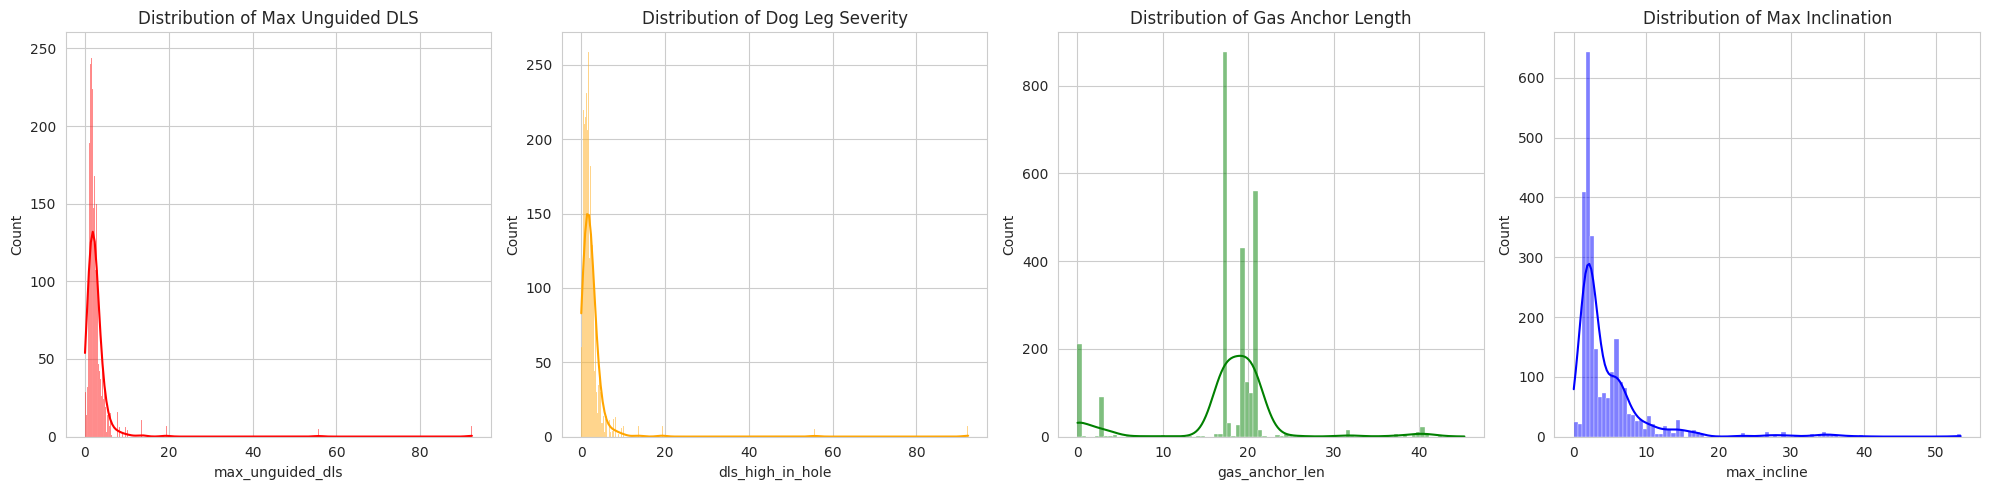

In [ ]:
# Mechanical variables

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# Max Unguided DLS
sns.histplot(df_rod['max_unguided_dls'], kde=True, ax=axes[0], color = 'red')
axes[0].set_title('Distribution of Max Unguided DLS')

# Dog Leg Severity
sns.histplot(df_rod['dls_high_in_hole'], kde=True, ax=axes[1], color = 'orange')
axes[1].set_title('Distribution of Dog Leg Severity')

# Gas Anchor Length
sns.histplot(df_rod['gas_anchor_len'], kde=True, ax=axes[2], color = 'green')
axes[2].set_title('Distribution of Gas Anchor Length')

# Maximum Inclination
sns.histplot(df_rod['max_incline'], kde=True, ax=axes[3], color = 'blue')
axes[3].set_title('Distribution of Max Inclination')

plt.tight_layout()
plt.show()


### Max Unguided DLS (Dog Leg Severity)

- Distribution: Highly concentrated near zero with very few instances extending up to around 50 degrees. The distribution has a sharp peak close to zero.

- Insight: This indicates that most wells have a very low unguided DLS, suggesting either stable drilling conditions or effective avoidance of significant deviations in the majority of wells.

- High values, although rare, might be areas of concern for structural integrity and could potentially influence pump failures.

### Dog Leg Severity High in Hole

- Distribution: Similar to the Max Unguided DLS, most values are near zero, indicating minimal severity in the structure of the wellbore at higher depths.

- Insight: The skew towards lower values suggests good control over the wellbore trajectory during drilling, which could be beneficial for reducing mechanical stresses on the rod pumps. 

- However, the long tail indicates that some wells might still face challenges with significant deviations.

### Gas Anchor Length

- Distribution: The distribution is multi-modal, showing specific common lengths around 5 and 15 units, with a few occurrences around 25 to 30.

- Insight: The specific peaks may represent standard sizes used in operations. Gas anchor lengths are crucial for efficient gas separation and fluid lifting; inappropriate lengths could affect the pump’s operational efficiency and failure rates.

### Max Inclination

- Distribution: Most values are again clustered near zero with a small number of wells showing higher inclinations up to about 20 degrees.

- Insight: This indicates that while most wells maintain a near-vertical orientation, a subset with higher inclinations might be exposed to increased mechanical stresses, potentially contributing to higher failure rates.

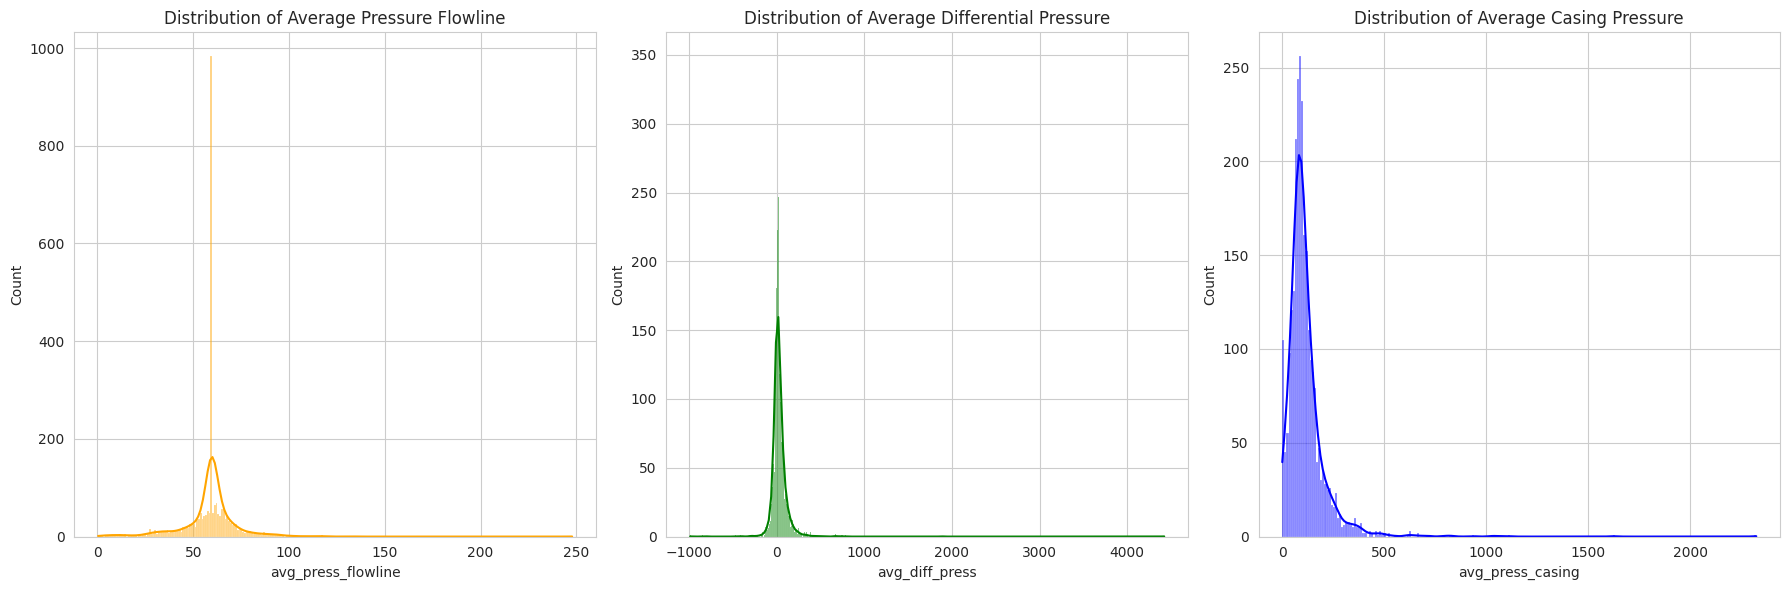

In [ ]:
# Pressure Varaibles 

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Average Pressure Flowline
plt.subplot(1, 3, 1)
sns.histplot(df_rod['avg_press_flowline'], kde=True, color = 'orange')
plt.title('Distribution of Average Pressure Flowline')

# Average Differential Pressure
plt.subplot(1, 3, 2)
sns.histplot(df_rod['avg_diff_press'], kde=True, color = 'green')
plt.title('Distribution of Average Differential Pressure')

# Average Casing Pressure
plt.subplot(1, 3, 3)
sns.histplot(df_rod['avg_press_casing'], kde=True, color = 'blue')
plt.title('Distribution of Average Casing Pressure')

plt.tight_layout()  # Adjusts plot parameters for better layout
plt.show()


### Average Pressure in the Flowline:

-   The distribution is sharply peaked around a specific value near the lower end, suggesting that most wells have a similar, relatively low flowline pressure.

-   The data shows a narrow distribution, indicating that variations from the common pressure level are rare or minimal.

### Average Differential Pressure:

-   This distribution is highly concentrated at a very low differential pressure with almost all the data clustered near zero.

-   The presence of few outliers suggests some wells may experience significantly different pressure conditions, which could be crucial for identifying stress factors or operational anomalies.

### Average Pressure in Casing: 

-   Similar to the flowline pressure, this variable also shows a sharp peak at a lower value, indicating a commonality in casing pressures among the majority of the wells.

-   The tail extending to higher values shows that some wells might be subjected to higher casing pressures, which could be an important factor in the operational health and risk of failure.

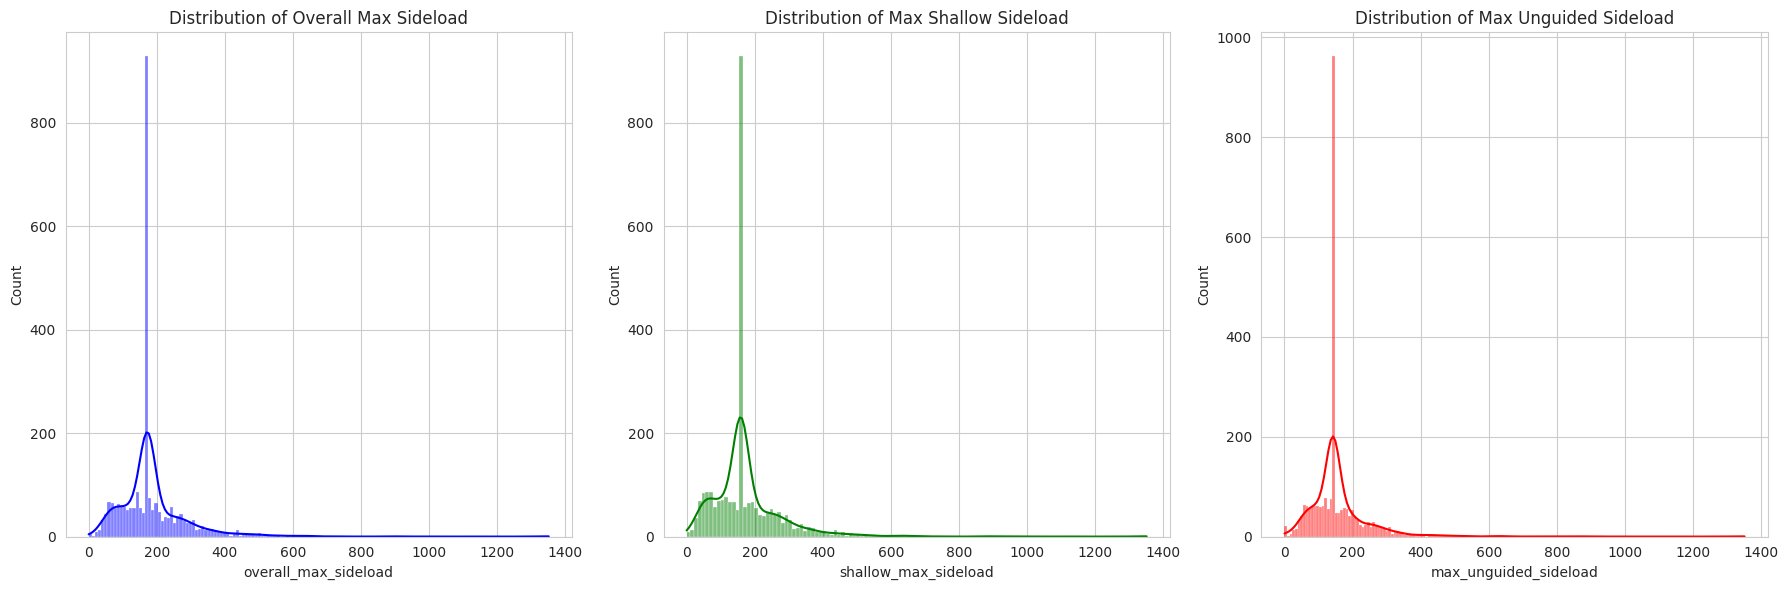

In [ ]:
# Set up the figure with multiple subplots
plt.figure(figsize=(18, 6))  # Wider figure to accommodate three subplots

# Plot for Overall Max Sideload
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(df_rod['overall_max_sideload'], kde=True, color='blue')
plt.title('Distribution of Overall Max Sideload')

# Plot for Max Shallow Sideload
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(df_rod['shallow_max_sideload'], kde=True, color='green')
plt.title('Distribution of Max Shallow Sideload')

# Plot for Max Unguided Sideload
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(df_rod['max_unguided_sideload'], kde=True, color='red')
plt.title('Distribution of Max Unguided Sideload')

plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()  # Display the plots


### Overall Max Sideload:

-   High sideload values can indicate stress on the rod, potentially leading to failures. Wells with high max sideload should be monitored closely for signs of wear and tear.

### Max Shallow Sideload:

-   Shallow sideloads are less extreme compared to the overall sideloads, which might suggest that issues occurring at shallower depths are generally less severe but more frequent.

### Max Unguided Sideload:

-   Given the rarity of high unguided sideloads, when they do occur, they could be indicative of unusual well conditions or mechanical issues that require immediate attention.



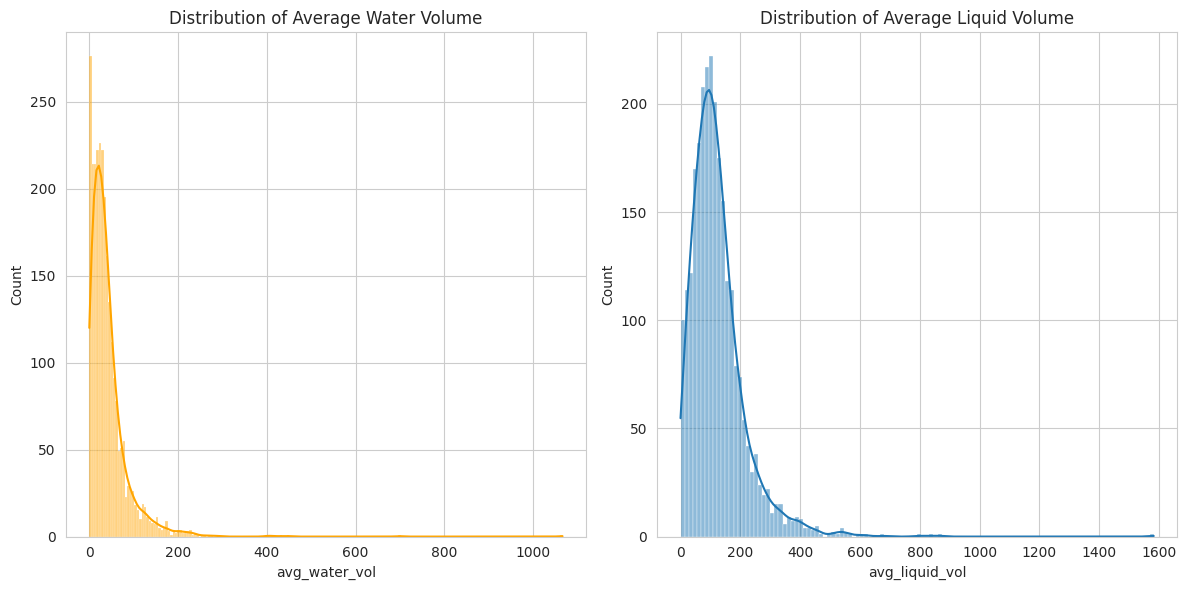

In [ ]:
# Production Volumes Variables

plt.figure(figsize=(12, 6))

# Average Water Volume
plt.subplot(1, 2, 1)
sns.histplot(df_rod['avg_water_vol'], kde=True, color = 'orange')
plt.title('Distribution of Average Water Volume')

# Average Liquid Volume
plt.subplot(1, 2, 2)
sns.histplot(df_rod['avg_liquid_vol'], kde=True)
plt.title('Distribution of Average Liquid Volume')

plt.tight_layout()
plt.show()



### Average Water Volume:
-   There are a few wells with relatively higher water volumes, indicating some variations in water production across the dataset.

### Average Liquid Volume:
-   The data has some outliers or wells with exceptionally high liquid volumes compared to the rest.



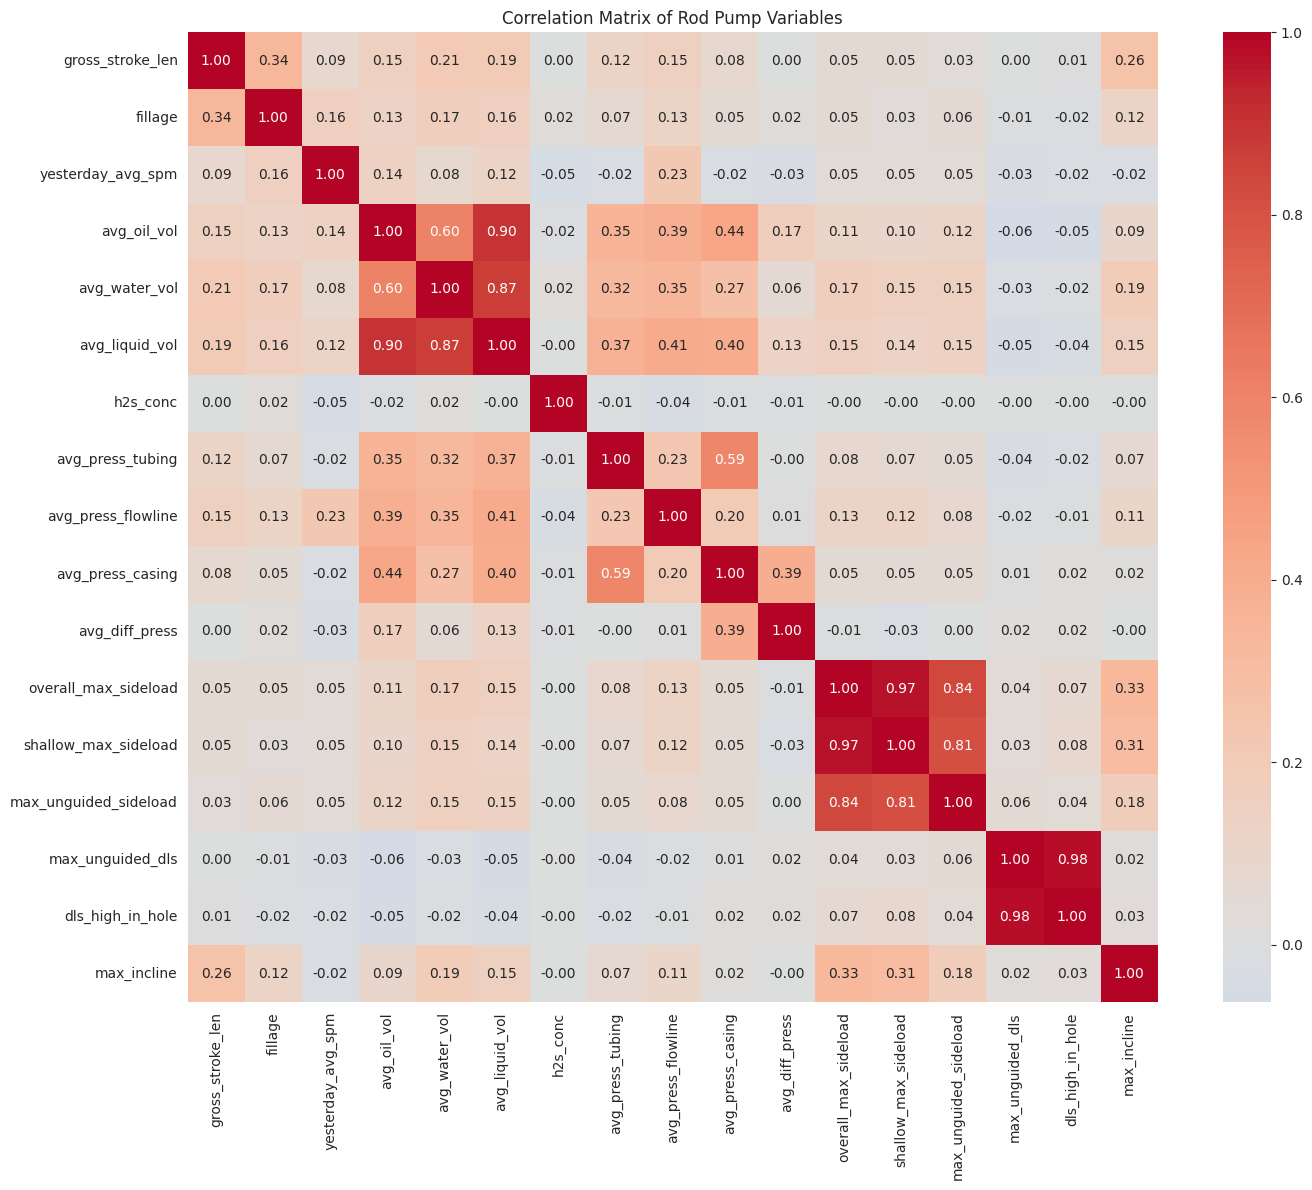


Strongest correlations:
avg_water_vol - avg_oil_vol: 0.602
avg_liquid_vol - avg_oil_vol: 0.902
avg_liquid_vol - avg_water_vol: 0.868
avg_press_casing - avg_press_tubing: 0.590
shallow_max_sideload - overall_max_sideload: 0.971
max_unguided_sideload - overall_max_sideload: 0.835
max_unguided_sideload - shallow_max_sideload: 0.814
dls_high_in_hole - max_unguided_dls: 0.980


In [ ]:
#trying to find some correlations



numerical_cols = [
    'gross_stroke_len', 'fillage', 'yesterday_avg_spm',
    'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol',
    'h2s_conc', 'avg_press_tubing', 'avg_press_flowline',
    'avg_press_casing', 'avg_diff_press',
    'overall_max_sideload', 'shallow_max_sideload', 'max_unguided_sideload',
    'max_unguided_dls', 'dls_high_in_hole', 'max_incline'
]

# Calculate correlation matrix
corr_matrix = df_rod[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Blue-red diverging colormap
            center=0,             # Center the colormap at 0
            fmt='.2f',           # Show 2 decimal places
            square=True)          # Make the plot square-shaped

plt.title('Correlation Matrix of Rod Pump Variables')
plt.tight_layout()
plt.show()

# Print strongest correlations (above 0.5 or below -0.5)
print("\nStrongest correlations:")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

avg_oil + avg_liquid + vol indicates more production

When looking at the tension points, 
 shallow_max_sideload  = more stress near the surface

 overall_max_sidelength  = highest stress anywhere

 max_unguided_sideloaded = stress in section without guides

 dls_high_in_hole and max_unguided_dls =  how sharply the well curves










now lets look into failures based on chemicals


/tmp/ipykernel_1892/2071499941.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
/tmp/ipykernel_1892/2071499941.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
/tmp/ipykernel_1892/2071499941.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
/tmp/ipykernel_1892/2071499941.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)


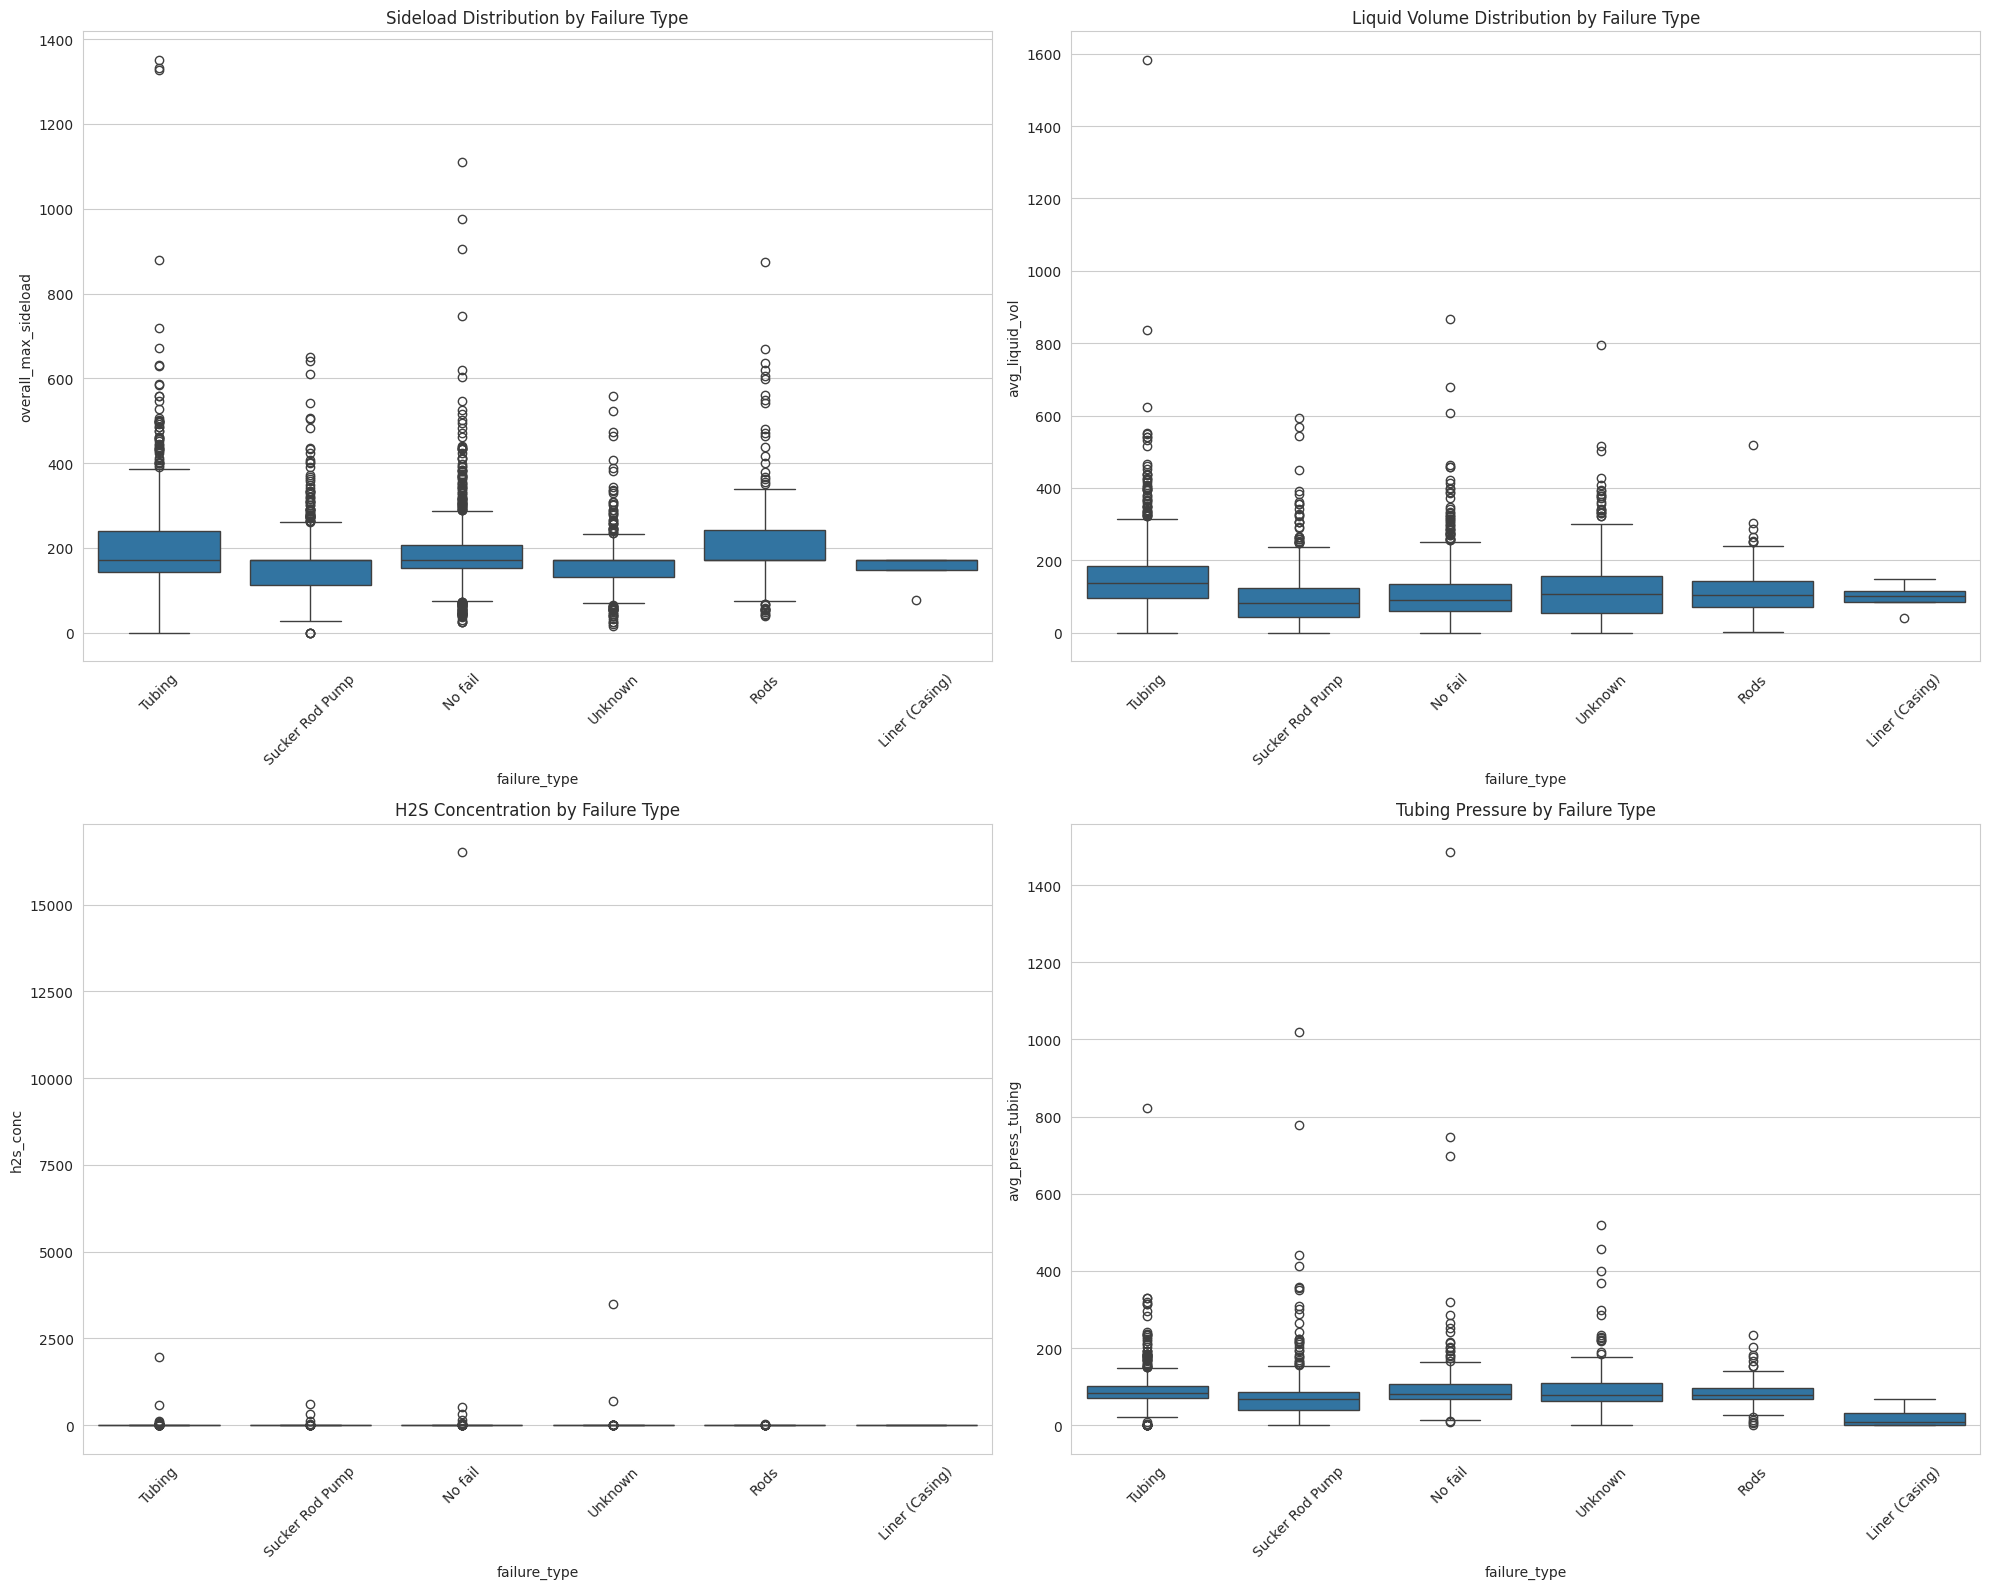

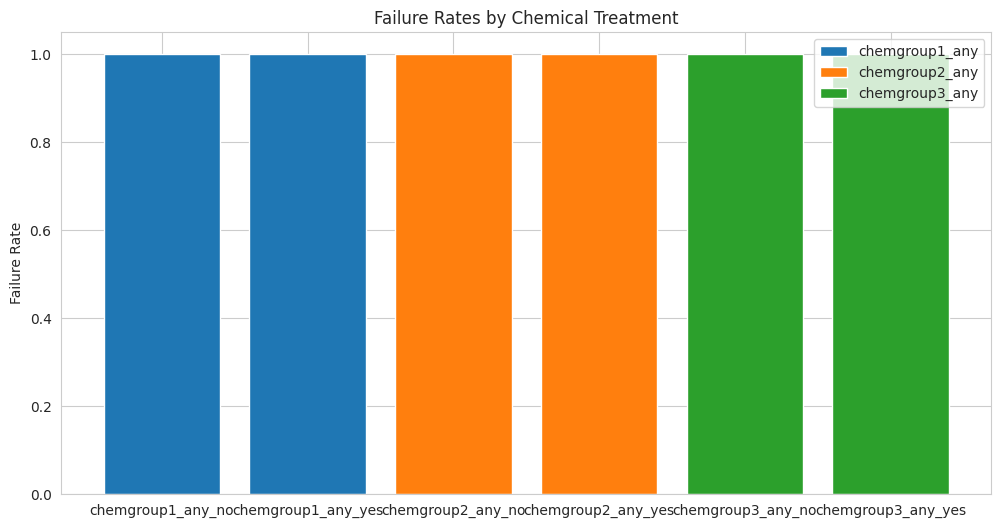

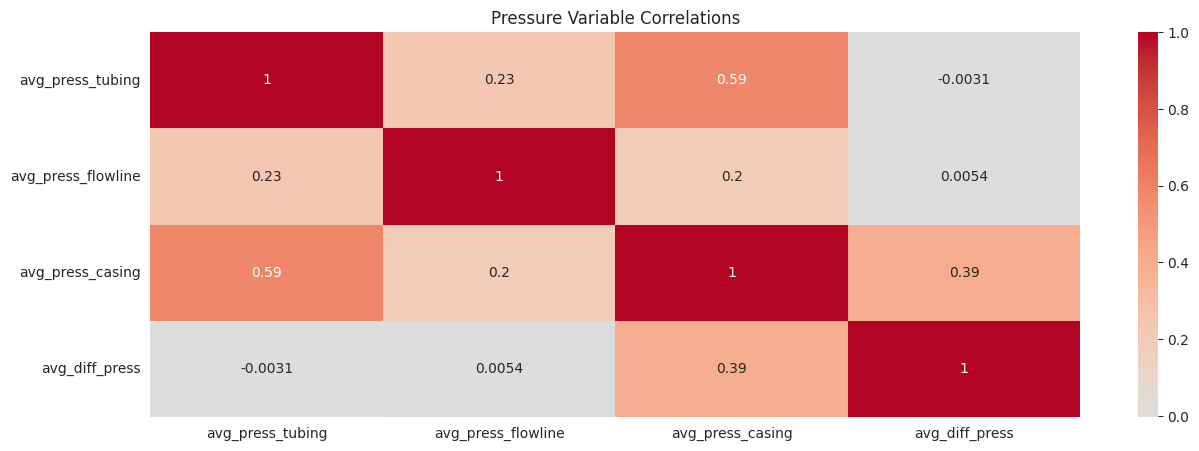


Summary Statistics by Failure Type:
                 overall_max_sideload  avg_liquid_vol  h2s_conc  \
failure_type                                                      
Liner (Casing)                 148.83           98.07      0.00   
No fail                        192.51          113.06     30.83   
Rods                           213.54          114.53      0.41   
Sucker Rod Pump                164.09           94.46      1.99   
Tubing                         200.28          154.38      3.60   
Unknown                        167.17          123.86     14.31   

                 avg_press_tubing  
failure_type                       
Liner (Casing)              21.75  
No fail                     92.24  
Rods                        83.71  
Sucker Rod Pump             71.42  
Tubing                      91.01  
Unknown                     91.67  


In [ ]:
def plot_failure_relationships(df):
    # Create subplots for key variables
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # Plot 1: Sideload vs Failure Types
    sns.boxplot(x='failure_type', y='overall_max_sideload', data=df, ax=axes[0,0])
    axes[0,0].set_title('Sideload Distribution by Failure Type')
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
    
    # Plot 2: Production Volumes vs Failure Types
    sns.boxplot(x='failure_type', y='avg_liquid_vol', data=df, ax=axes[0,1])
    axes[0,1].set_title('Liquid Volume Distribution by Failure Type')
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
    
    # Plot 3: H2S Concentration vs Failure Types
    sns.boxplot(x='failure_type', y='h2s_conc', data=df, ax=axes[1,0])
    axes[1,0].set_title('H2S Concentration by Failure Type')
    axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
    
    # Plot 4: Tubing Pressure vs Failure Types
    sns.boxplot(x='failure_type', y='avg_press_tubing', data=df, ax=axes[1,1])
    axes[1,1].set_title('Tubing Pressure by Failure Type')
    axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

# 2. Analyze chemical treatment effectiveness
def analyze_chemical_treatment(df):
    # Calculate failure rates with and without each chemical treatment
    treatments = ['chemgroup1_any', 'chemgroup2_any', 'chemgroup3_any']
    
    plt.figure(figsize=(12, 6))
    
    for treatment in treatments:
        # Calculate failure rates
        failure_rates = df.groupby(treatment)['failure_type'].apply(
            lambda x: (x != 'None').mean()
        )
        
        # Plot failure rates
        plt.bar([f'{treatment}_no', f'{treatment}_yes'], 
                failure_rates,
                label=treatment)
    
    plt.title('Failure Rates by Chemical Treatment')
    plt.ylabel('Failure Rate')
    plt.legend()
    plt.show()

# 3. Analyze pressure relationships more deeply
def analyze_pressure_relationships(df):
    plt.figure(figsize=(15, 5))
    
    # Plot pressure correlations
    pressure_vars = ['avg_press_tubing', 'avg_press_flowline', 
                    'avg_press_casing', 'avg_diff_press']
    
    corr_pressure = df[pressure_vars].corr()
    
    sns.heatmap(corr_pressure, annot=True, cmap='coolwarm', center=0)
    plt.title('Pressure Variable Correlations')
    plt.show()

# Run the analyses
plot_failure_relationships(df_rod)
analyze_chemical_treatment(df_rod)
analyze_pressure_relationships(df_rod)

# Print summary statistics for each failure type
print("\nSummary Statistics by Failure Type:")
failure_stats = df_rod.groupby('failure_type').agg({
    'overall_max_sideload': 'mean',
    'avg_liquid_vol': 'mean',
    'h2s_conc': 'mean',
    'avg_press_tubing': 'mean'
}).round(2)

print(failure_stats)

Mechanical stress (sideload) seems most critical for rod failures                                                                                                       
Corrosive conditions (H2S) appear most problematic for tubing failures                                                                                              
Higher liquid volumes and pressures correlate with tubing and rod failures                                                                                              
Liner failures occur under the least severe conditions, suggesting different failure mechanisms                                                                         

Liner (Casing) Failures:


Has the lowest sideload (77.52) of all failure types
Moderate liquid volume (98.07)
No H2S concentration (0.00)
Lowest tubing pressure (21.75)
Interpretation: These failures seem to occur in relatively low-stress conditions, suggesting they might be more related to wear and tear or material issues than operational stress


Rod Failures:


Highest sideload (228.06) of all types
High liquid volume (114.53)
Low H2S concentration (0.41)
High tubing pressure (83.82)
Interpretation: Rod failures appear strongly connected to mechanical stress (high sideload) and operational intensity (high volumes and pressure)


Sucker Rod Pump Failures:


Moderate sideload (158.99)
Lowest liquid volume (94.46)
Moderate H2S concentration (1.99)
Moderate tubing pressure (71.14)
Interpretation: These failures show balanced stress across parameters, suggesting they might be more related to normal wear and tear


Tubing Failures:
High sideload (202.03)
Highest liquid volume (135.86)
Highest H2S concentration (14.23)
Highest tubing pressure (91.75)
Interpretation: These failures occur under the most severe conditions - high mechanical stress, high volumes, corrosive conditions (H2S), and high pressure

# I STARTED HERE AGAIN

In [ ]:
# 1. load cleaned data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/rod_cleaned_final.csv')

## Numeric Variables for Histograms:

### Operational Parameters:

    avg_press_flowline (Average pressure in flowline)
    avg_press_tubing (Average pressure in tubing)
    avg_press_casing (Average pressure in casing)
    avg_diff_press (Average differential pressure)
    stroke_len (Stroke length)
    gross_stroke_len (Gross stroke length)
    fillage (Pump fillage efficiency)
    yesterday_avg_spm (Strokes per minute)
    max_incline (Max wellbore inclination)

### Production Metrics:

    avg_oil_vol (Average oil volume produced)
    avg_water_vol (Average water volume produced)
    avg_liquid_vol (Average total liquid volume produced)

### Mechanical Metrics:

    max_unguided_dls (Dog leg severity)
    overall_max_sideload (Overall maximum sideload)
    max_unguided_sideload (Max unguided sideload)
    enduralloy_len (Length of Enduralloy-coated sections)
    nip_set_depth (Nipple set depth)

### Log-Transformed Variables:
    Include histograms for the _log versions of these variables since they were transformed to reduce skewness.


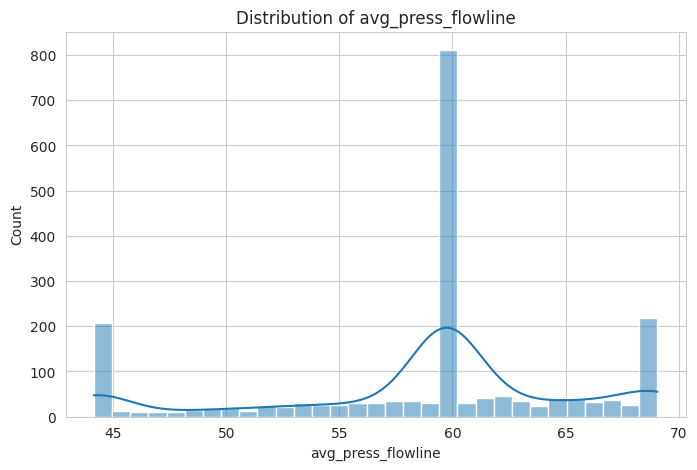

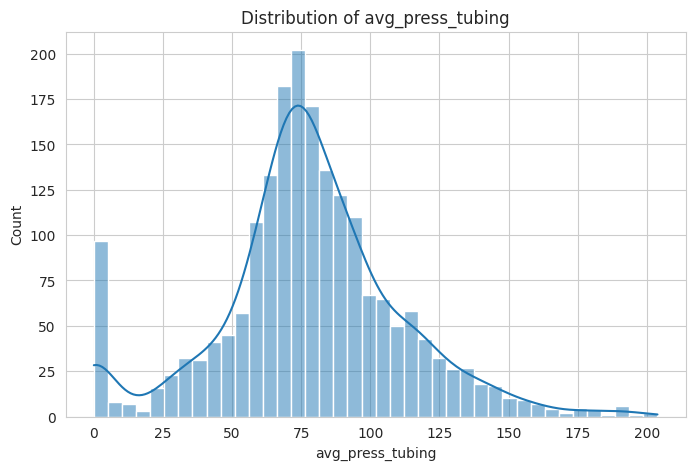

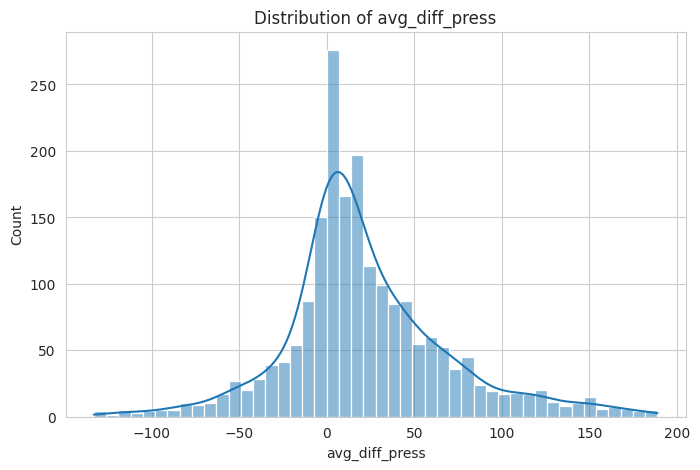

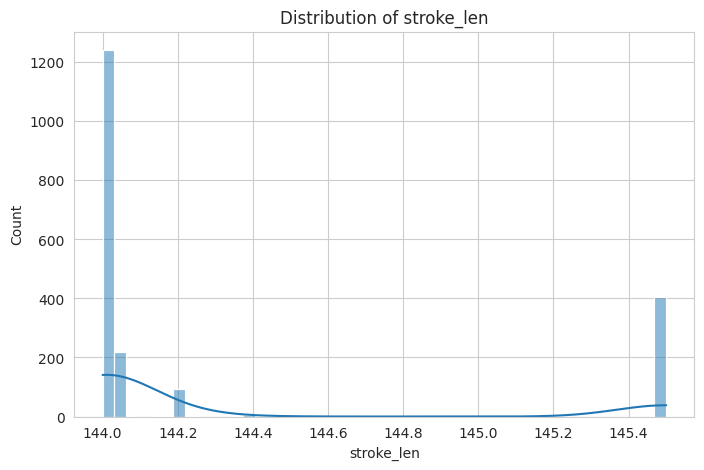

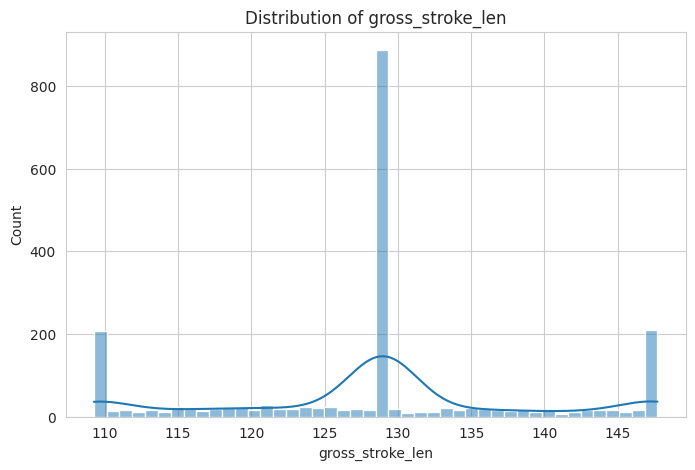

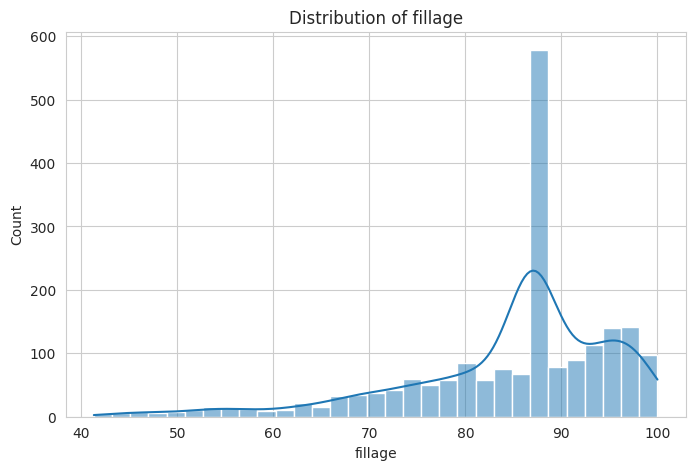

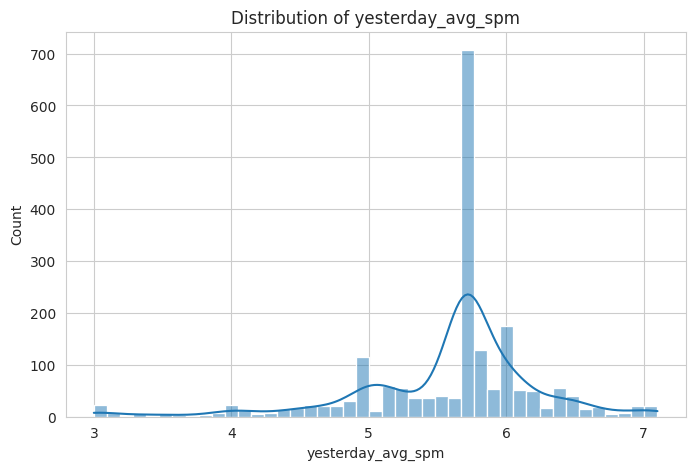

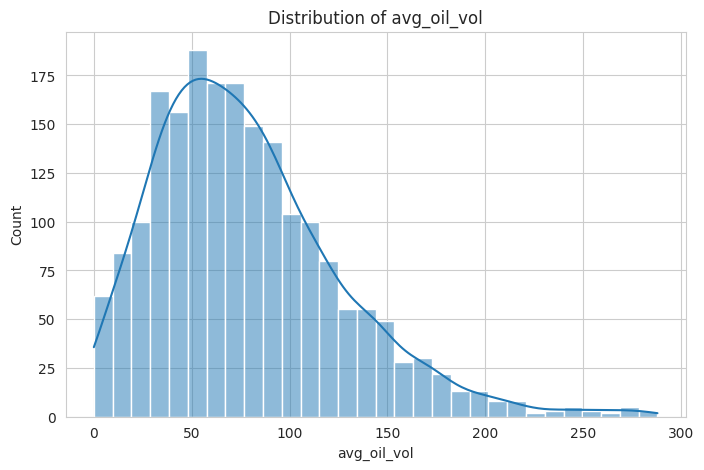

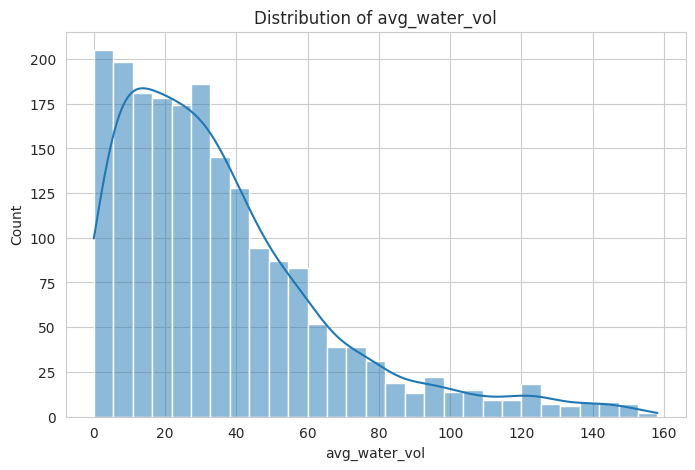

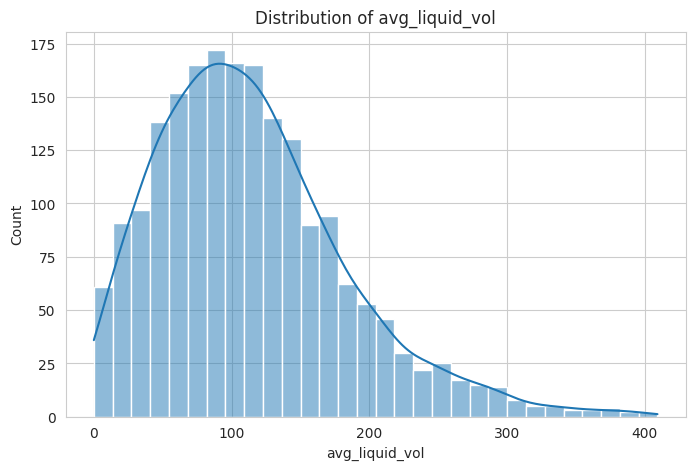

In [ ]:
# 2. Univariate Analysis

# Goal: explore distribution of individual variables.

# for numerical variables: use histogram and boxplots to see distributions and identify any remaining anomalies.

numeric_vars = ['avg_press_flowline', 'avg_press_tubing', 'avg_diff_press', 
                'stroke_len', 'gross_stroke_len', 'fillage', 'yesterday_avg_spm', 
                'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol']

for var in numeric_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

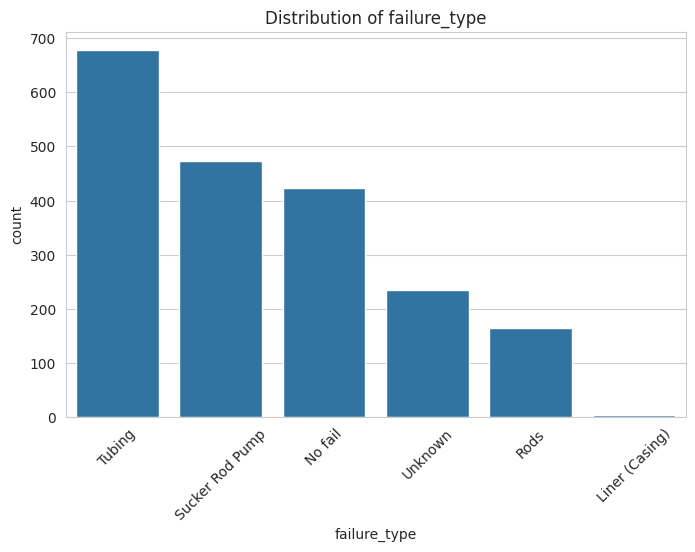

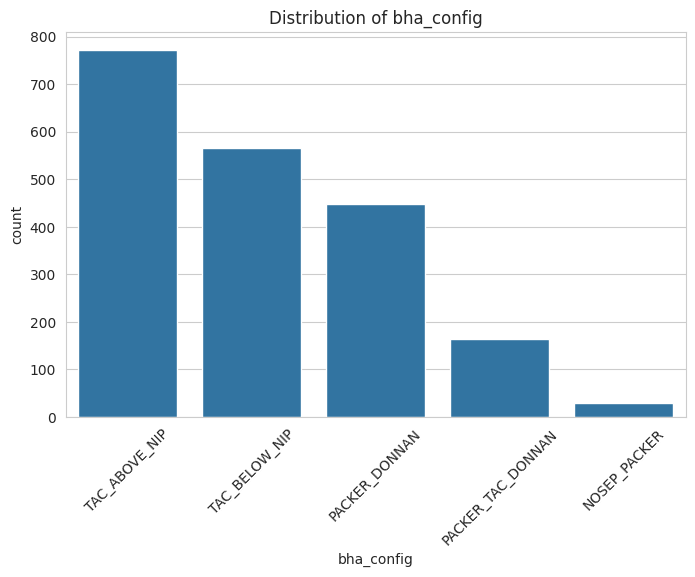

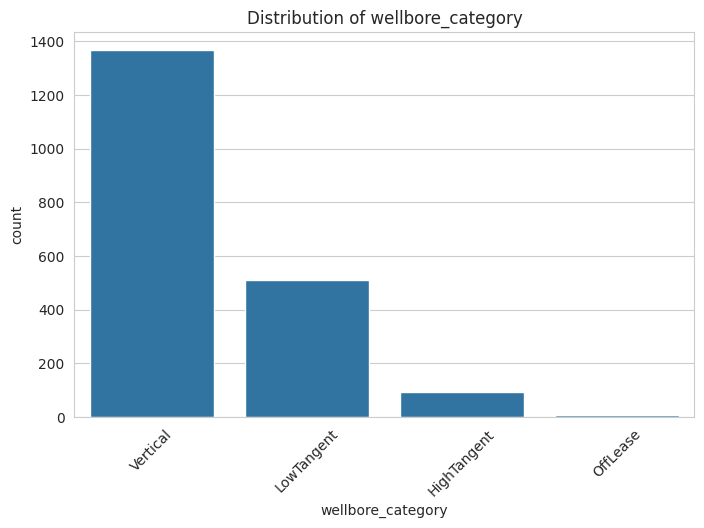

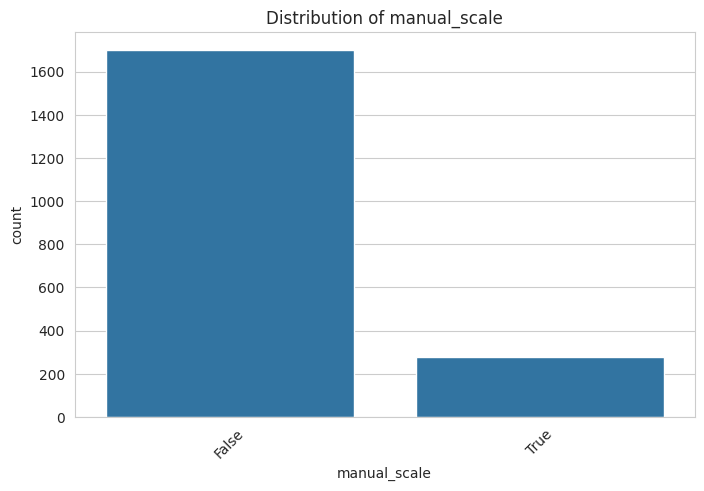

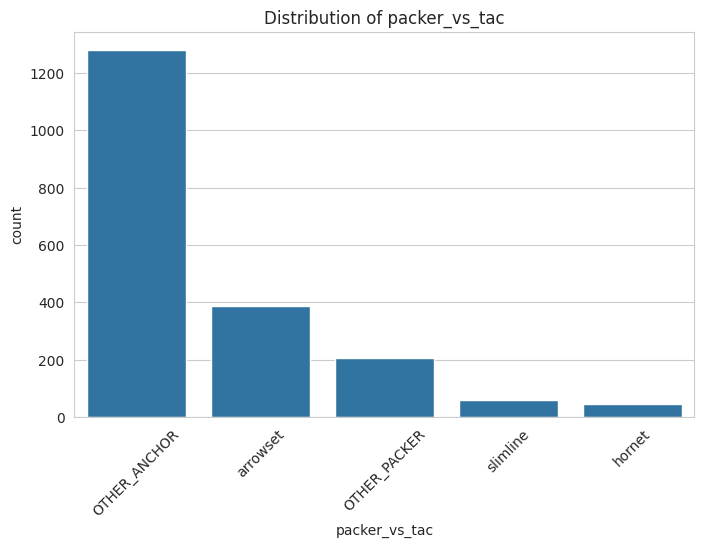

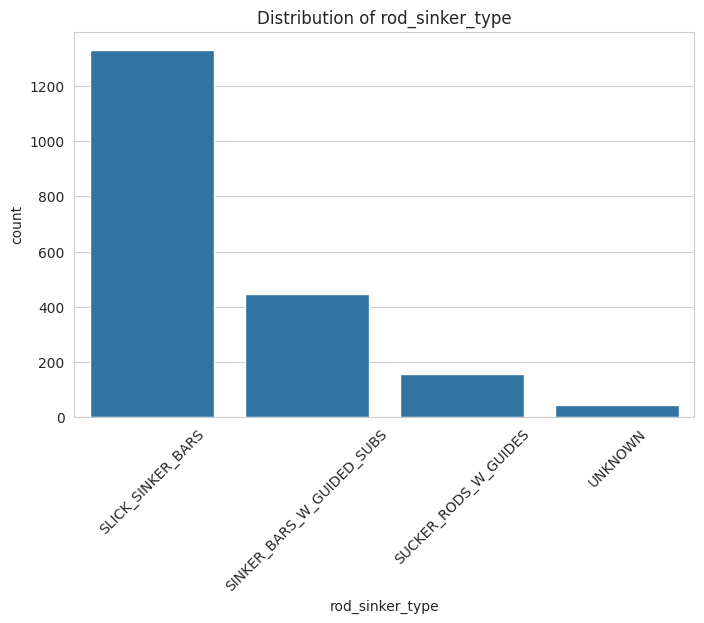

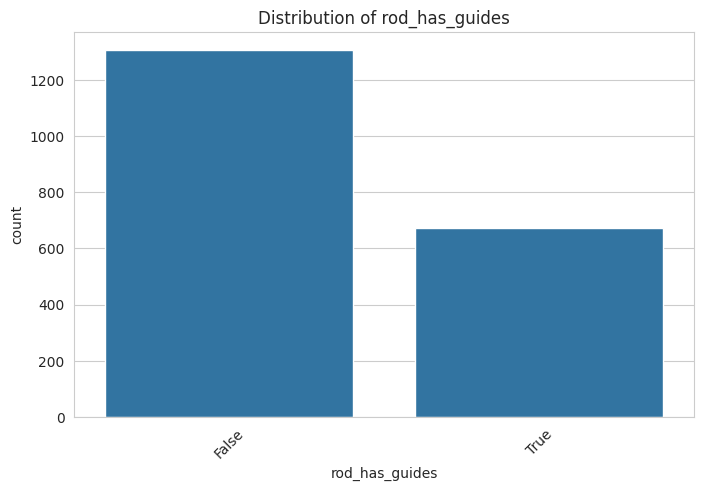

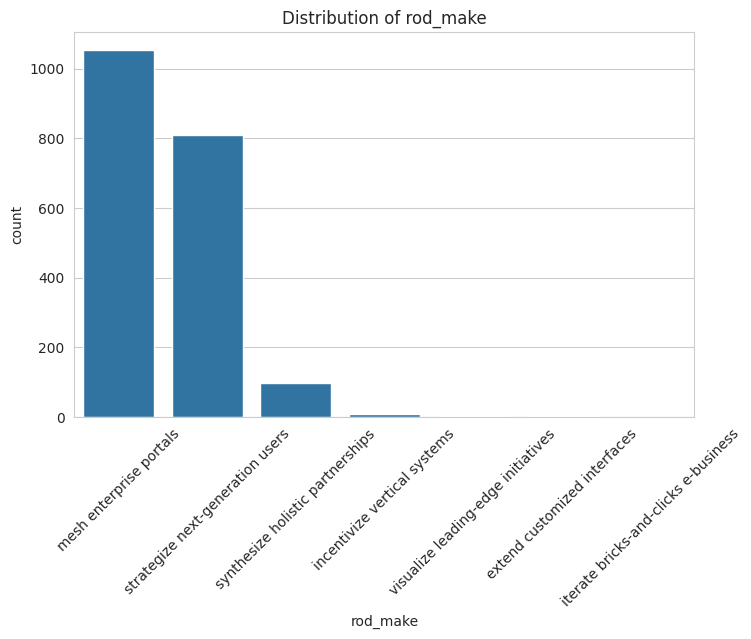

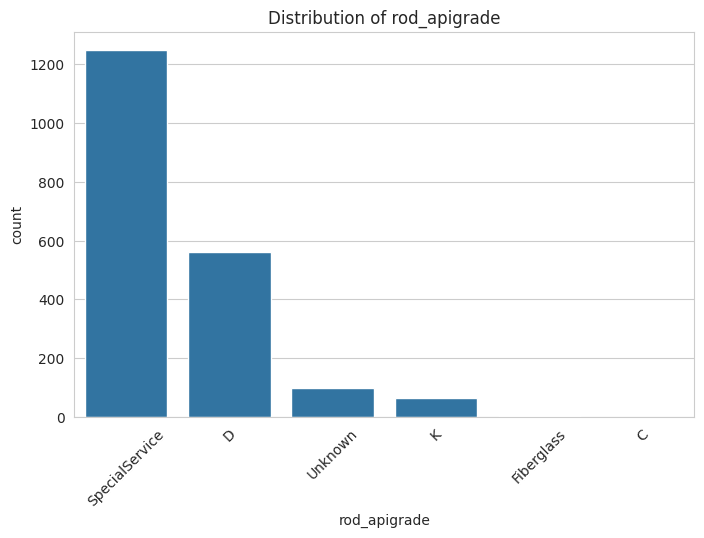

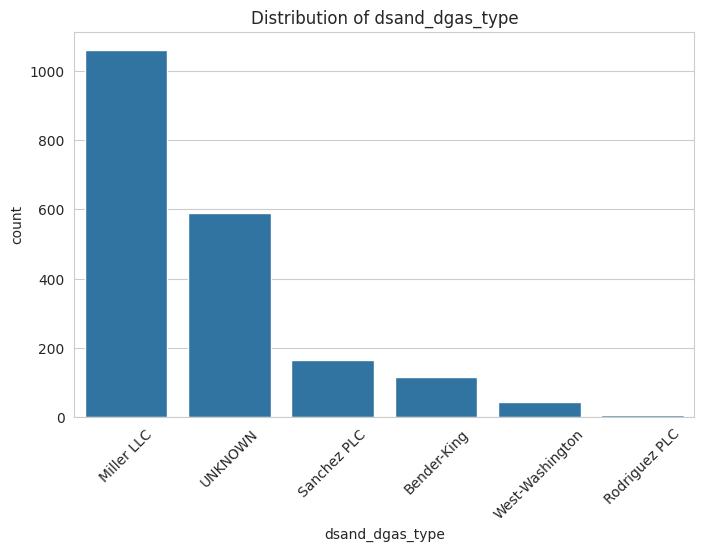

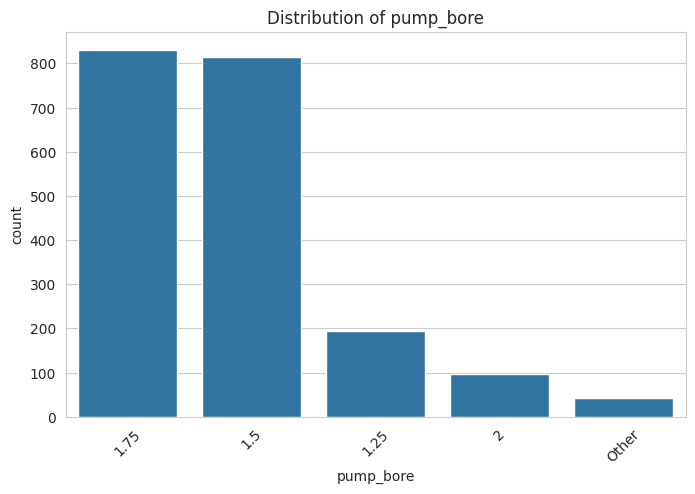

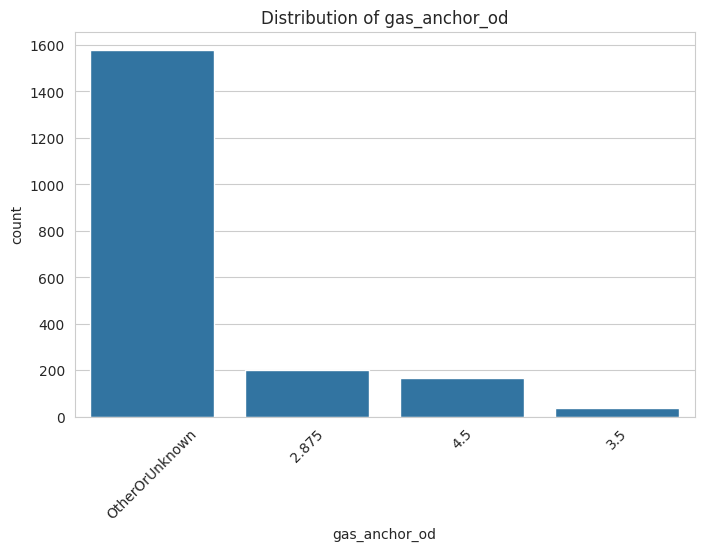

In [ ]:
# 3. Categorical Variables Analysis

# Goal: Explore distribution of categorical variables.

categorical_vars = ['failure_type', 'bha_config', 'wellbore_category', 'manual_scale', 
                   'packer_vs_tac', 'rod_sinker_type', 'rod_has_guides', 'rod_make', 
                   'rod_apigrade', 'dsand_dgas_type', 'pump_bore', 'gas_anchor_od']

for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()


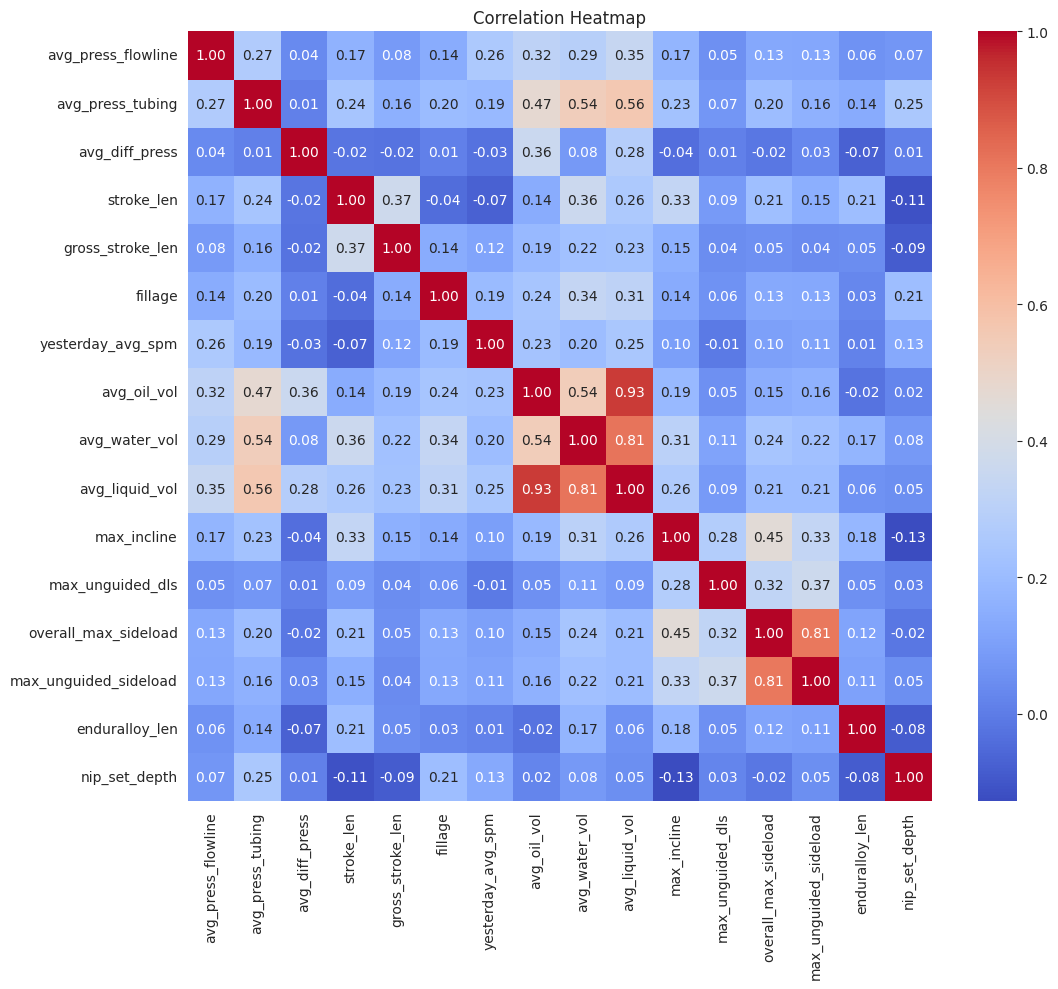

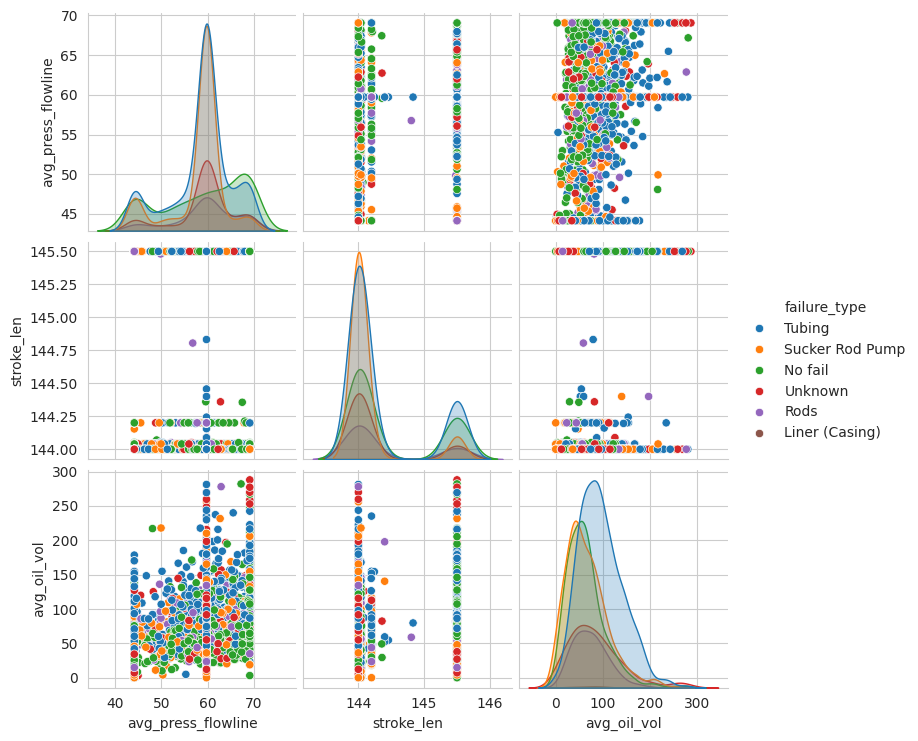

In [ ]:
# 2.3 Next Steps: Bivariate Analysis

# Goal: Explore relationships between variables.

# Example code to start:
# Correlation heatmap for numeric variables
plt.figure(figsize=(12, 10))
numeric_vars = ['avg_press_flowline', 'avg_press_tubing', 'avg_diff_press', 'stroke_len', 'gross_stroke_len', 'fillage', 'yesterday_avg_spm', 'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol', 'max_incline', 'max_unguided_dls', 'overall_max_sideload', 'max_unguided_sideload', 'enduralloy_len', 'nip_set_depth']
correlation_matrix = df[numeric_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for key variables
sns.pairplot(df, vars=['avg_press_flowline', 'stroke_len', 'avg_oil_vol'], hue='failure_type')
plt.show()

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/rod_cleaned_no_transform.csv")

# Print all column names
print(df.columns.tolist())


['rod_uid', 'uwi', 'well_name', 'well_id', 'bha_tubing_id', 'bha_lifetime_start', 'bha_lifetime_end', 'bha_lifetime_id', 'failure_type', 'h2s_conc', 'primary_setpoint', 'secondary_setpoint', 'stroke_len', 'gross_stroke_len', 'fillage', 'yesterday_avg_spm', 'bha_config', 'chemgroup1_any', 'chemgroup1_all', 'chemgroup2_any', 'chemgroup2_all', 'chemgroup3_any', 'chemgroup3_all', 'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_len', 'max_incline', 'wellbore_category', 'manual_scale', 'packer_vs_tac', 'avg_press_flowline', 'avg_press_tubing', 'avg_press_casing', 'avg_diff_press', 'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol', 'avg_watersg', 'rod_sinker_type', 'rod_has_guides', 'rod_make', 'rod_apigrade', 'route', 'overall_max_sideload', 'shallow_max_sideload', 'max_unguided_sideload', 'dsand_dgas_type', 'chrome_len', 'enduralloy_len', 'poly_len', 'nip_set_depth', 'pump_bore', 'gas_anchor_od', 'bha_lifetime']
